In [19]:
import numpy as np

In [47]:
X = np.load('/Users/apple/Desktop/181 Final/X.npy')
Y = np.load('/Users/apple/Desktop/181 Final/Y.npy') 
print(X.shape)
print(Y.shape)

(5547, 50, 50, 3)
(5547,)


In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print(Y_train.shape)
print(Y_test.shape)
print(Y_train[:20])

(4437,)
(1110,)
[0 1 1 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 1 0]


In [22]:
print('Image dataset have shape =', X_train.shape)
print('Image dataset has min/mean/std/max = %.2f/%.2f/%.2f/%.2f'%(X_train.min(),
                        X_train.mean(), X_train.std(), X_train.max()))
print('')
print('Train label has shape =', Y_train.shape)
print('Training label has min/mean/std/max = %.2f/%.2f/%.2f/%.2f'%(Y_train.min(),
                        Y_train.mean(), Y_train.std(), Y_train.max()))

Image dataset have shape = (4437, 50, 50, 3)
Image dataset has min/mean/std/max = 2.00/185.18/47.20/255.00

Train label has shape = (4437,)
Training label has min/mean/std/max = 0.00/0.50/0.50/1.00


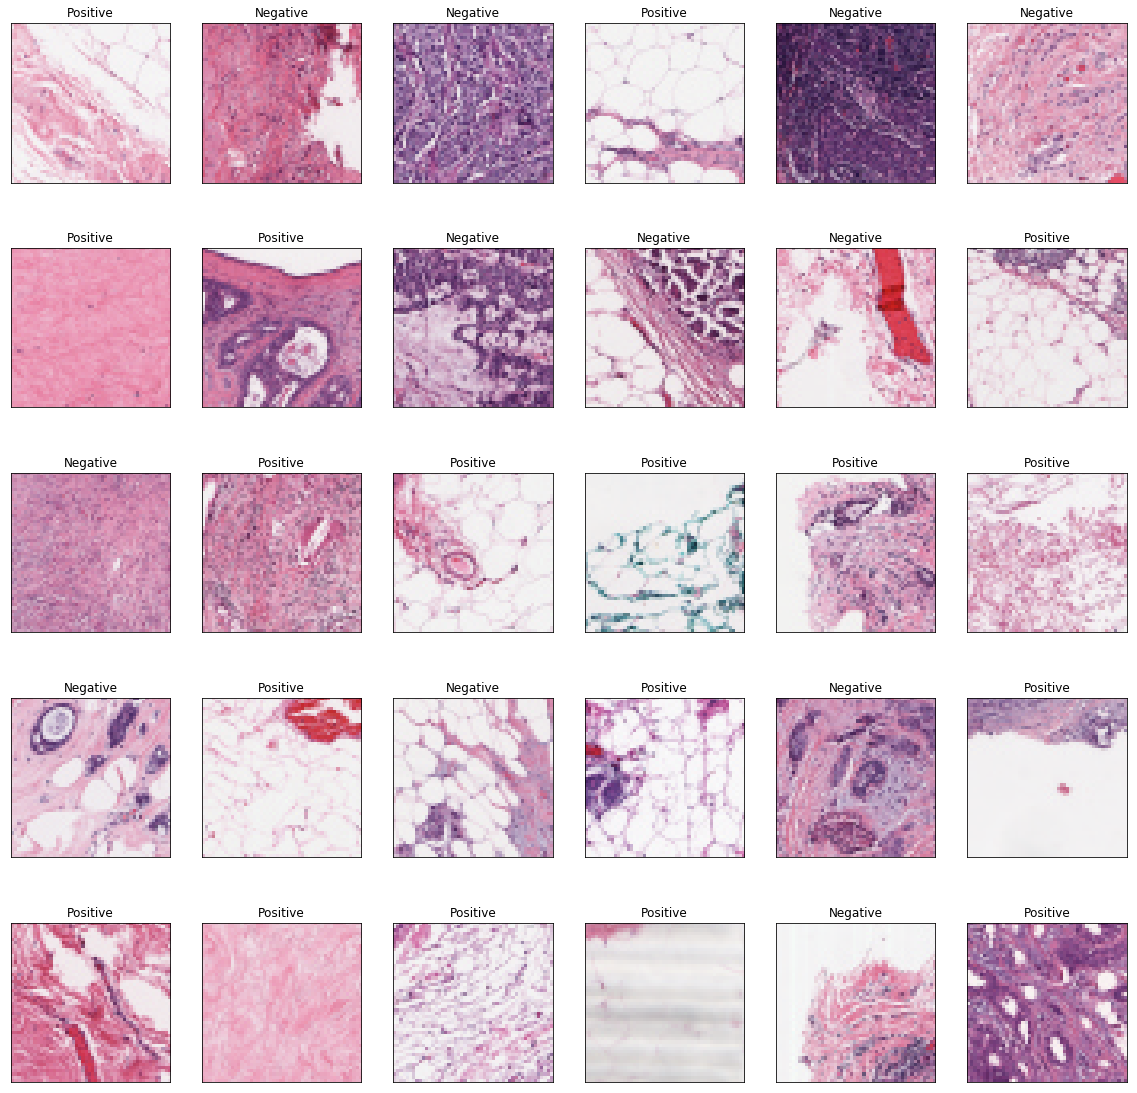

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,20))
class_labels = ['Positive', 'Negative']
for i in range(30):
    plt.subplot(5,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title(class_labels[Y_train[i]])
    plt.imshow(X_train[i])

In [26]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as utils

In [52]:
transform = transforms.Compose(
 [transforms.ToTensor(),
 transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
tensor_x = torch.stack([torch.Tensor(i) for i in X_train]) # transform to torch tensors
tensor_y = torch.from_numpy(Y_train)
trainset = utils.TensorDataset(tensor_x,tensor_y) # create your datset
trainloader = utils.DataLoader(trainset,  batch_size=9)
tensor_x_test = torch.stack([torch.Tensor(i) for i in X_test]) # transform to torch tensors
tensor_y_test = torch.from_numpy(Y_test)
testset = utils.TensorDataset(tensor_x_test,tensor_y_test) # create your datset
testloader = utils.DataLoader(testset,  batch_size=4,)
device = torch.device("cpu")
classes = ('Positive', 'Negative')

In [53]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(images.size())
images = images.permute(0, 3, 1, 2)
print(images.size())
temp = images.numpy()
print(len(temp[0]))
print(len(temp[0][0]))
print(len(temp[0][0][0]))

torch.Size([9, 50, 50, 3])
torch.Size([9, 3, 50, 50])
3
50
50


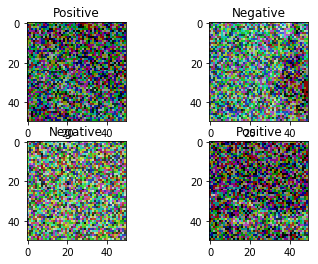

In [54]:
# Show images.
rows = 2
columns = 2
fig=plt.figure()
for i in range(4):
    fig.add_subplot(rows, columns, i+1)
    plt.title(classes[labels[i]])
    img = images[i] / 2 + 0.5     # this is for unnormalize the image
    img = torchvision.transforms.ToPILImage()(img)
    plt.imshow(img)
plt.show()

In [63]:
import torchvision.models.alexnet

In [66]:
model = torchvision.models.alexnet(pretrained=False,  num_classes=2)

In [70]:
class Net(nn.Module):

    def __init__(self, num_classes=2):
        super(Net, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(64, 192, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
        )
        self.avgpool = nn.AdaptiveAvgPool2d((6, 6))
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), 256 * 6 * 6)
        x = self.classifier(x)
        return x
    
net = Net()
net.to(device)

Net(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace)
    (3): Dropout(p=0.5

In [ ]:
loss_func = nn.CrossEntropyLoss()
# We use stochastic gradient descent (SGD) as optimizer.
opt = torch.optim.Adam(net.parameters(), lr=0.001)
#opt = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)
avg_losses = [] # Avg. losses.
epochs = 10 # Total epochs.
print_freq = 200 # Print frequency.
for epoch in range(epochs): # Loop over the dataset multiple times.
    running_loss = 0.0 # Initialize running loss.
    for i, data in enumerate(trainloader, 0):
        # Get the inputs.
        inputs, labels = data
        inputs = inputs.permute(0, 3, 1, 2)
        # Move the inputs to the specified device.
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients.
        opt.zero_grad()
        # Forward step.
        outputs = net(inputs)
        #print(outputs)
        #print(labels)
        loss = loss_func(outputs, labels)

        # Backward step.
        loss.backward()

        # Optimization step (update the parameters).
        opt.step()
        # Print statistics.
        running_loss += loss.item()
        if i % print_freq == print_freq - 1: # Print every several minibatches.
            avg_loss = running_loss / print_freq
            print('[epoch: {}, i: {:5d}] avg mini-batch loss: {:.3f}'.format(epoch, i, avg_loss))
            avg_losses.append(avg_loss)
            running_loss = 0.0
print('Finished Training.')

[epoch: 0, i:   154] avg mini-batch loss: 1.774
[epoch: 0, i:   309] avg mini-batch loss: 0.694
[epoch: 0, i:   464] avg mini-batch loss: 0.693
[epoch: 1, i:   154] avg mini-batch loss: 0.709


In [ ]:
plt.plot(avg_losses)
plt.xlabel('mini-batch index / {}'.format(print_freq))
plt.ylabel('avg. mini-batch loss')
plt.show()

In [ ]:
net.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.permute(0, 3, 1, 2)
        images = images.to(device)
        labels = labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(total)
print('Accuracy of the network on the 40 test images: %d %%' % (100 * correct / total))

In [ ]:
# Get test accuracy for each class.
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.permute(0, 3, 1, 2)
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(1):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1
for i in range(2):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))